In [52]:
import pandas as pd
import numpy as np
import sys, zipfile, os, time
import matplotlib.pyplot as plt
import glob
import datetime
import urllib3
import cdsapi
import xarray
import shutil
import warnings
import pickle
import h5py
import netCDF4
warnings.filterwarnings('ignore')

sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua3 as eua

In [53]:
def get_adj(station):
    import datetime
    """Compare created adjustment to downloaded adjustment
    """
    date0 = datetime.datetime.strptime('1900-01-01', "%Y-%m-%d")

    file = glob.glob('./Humidity_adjustments/files/downloaded/downloaded_'+station+'/dest_*_relative_humidity_adjusted.nc')[0]
    data = eua.CDMDataset(file).to_dataframe()
    daydata = data[data.time.dt.hour > 6][data.time.dt.hour <= 18]
    nightdata = data[data.time.dt.hour <= 6].append(data[data.time.dt.hour > 18])
    
    c = cdsapi.Client()
    r = c.retrieve('insitu-comprehensive-upper-air-observation-network',
                   {'variable': 'relative_humidity',
                    'optional':['humidity_bias_estimate'],
                    'statid': station,
                    'pressure_level':[10,20,30,50,70,100,150,200,250,300,400,500,700,850,925,1000]
                   }
                  )
    r.download(target='download.zip')
    assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
    z = zipfile.ZipFile('download.zip')
    z.extractall(path='./tocompare/hur/cds_'+station)
    z.close()
    cdsfile = glob.glob('./tocompare/hur/cds_'+ station +'/*.nc')
    cdsdata=eua.CDMDataset(cdsfile[0]).to_dataframe()
    daycdsdata = cdsdata[cdsdata.time.dt.hour > 6][cdsdata.time.dt.hour <= 18]
    nightcdsdata = cdsdata[cdsdata.time.dt.hour <= 6].append(cdsdata[cdsdata.time.dt.hour > 18])
    
    return daydata, nightdata, daycdsdata, nightcdsdata

In [54]:
def plt_adj(cdata, adata, plev, station, time, adj, save):
    cdata = cdata[cdata.plev == plev*100]
    adata = adata[adata.plev == plev*100]
    fig, ax = plt.subplots()
    ax.scatter(cdata['time'], cdata.humidity_bias_estimate, label='CDS')
    ax.scatter(adata['time'], adata.hur_bias_estimate, label='Calc')

    ax.set(xlabel='time', ylabel='Adjustment: '+adj,
           title= str(station)+' Temperature '+str(plev)+' hPa '+time)
    ax.legend()
    ax.grid()
    
    if save:
        fig.savefig(str(station)+'_Temperature_'+str(plev)+'_hPa_'+time+'.png')
    plt.show()
    return

2021-05-03 16:38:29,372 INFO Reading Profile on slice(None, None, None)
2021-05-03 16:38:32,165 INFO Welcome to the CDS
2021-05-03 16:38:32,166 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-05-03 16:38:32,381 INFO Request is queued
2021-05-03 16:38:33,416 INFO Request is running
2021-05-03 16:38:40,647 INFO Request is completed
2021-05-03 16:38:40,648 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1620052720.070545-28848-17-739c3e0a-370c-4367-bc7a-96f50be1e990.zip to download.zip (16.6M)
2021-05-03 16:38:41,192 INFO Download rate 30.5M/s  
2021-05-03 16:38:41,251 INFO Reading Profile on slice(None, None, None)


1
2


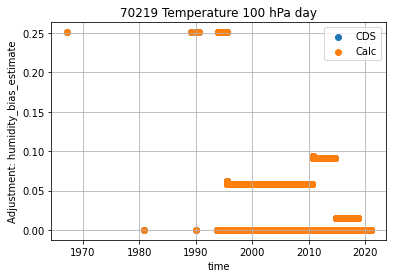

1
2


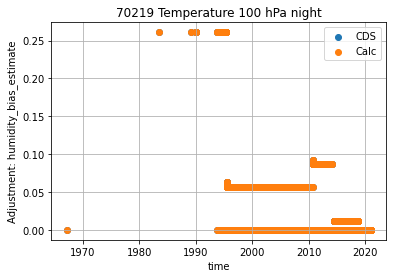

1
2


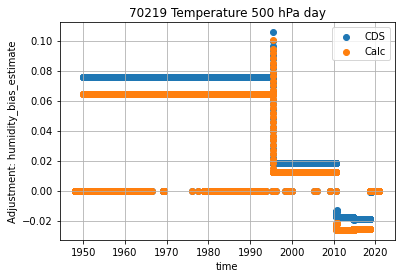

1
2


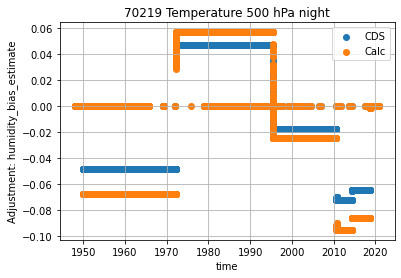

1
2


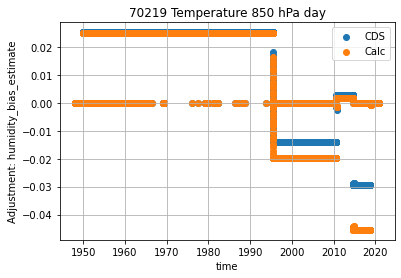

1
2


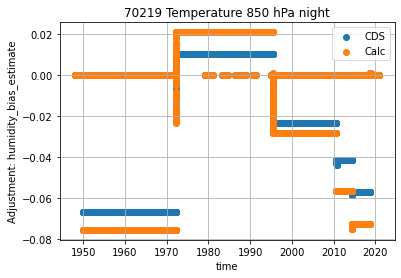

In [51]:
station = '70219'
dd, nd, dcd, ncd = get_adj(station)

plt_adj(dcd, dd, 100, station, 'day', 'humidity_bias_estimate', save=True)
plt_adj(ncd, nd, 100, station, 'night', 'humidity_bias_estimate', save=True)
plt_adj(dcd, dd, 500, station, 'day', 'humidity_bias_estimate', save=True)
plt_adj(ncd, nd, 500, station, 'night', 'humidity_bias_estimate', save=True)
plt_adj(dcd, dd, 850, station, 'day', 'humidity_bias_estimate', save=True)
plt_adj(ncd, nd, 850, station, 'night', 'humidity_bias_estimate', save=True)

1
2


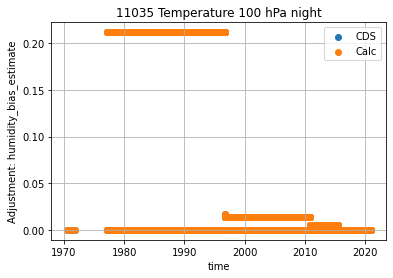

2021-05-04 08:34:26,926 INFO Reading Profile on slice(None, None, None)
2021-05-04 08:34:29,936 INFO Welcome to the CDS
2021-05-04 08:34:29,937 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-05-04 08:34:30,967 INFO Request is completed
2021-05-04 08:34:30,968 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1620052532.692893-14260-11-d1cb52e0-511a-4912-b374-6f66ea809c93.zip to download.zip (22.7M)
2021-05-04 08:34:32,231 INFO Download rate 18M/s    
2021-05-04 08:34:32,408 INFO Reading Profile on slice(None, None, None)


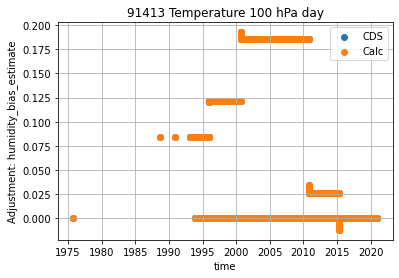

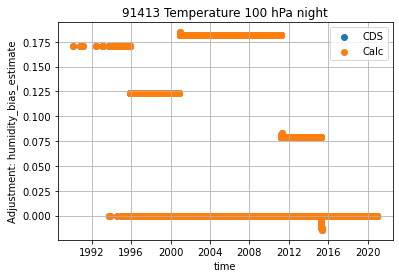

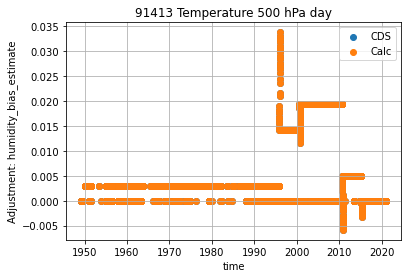

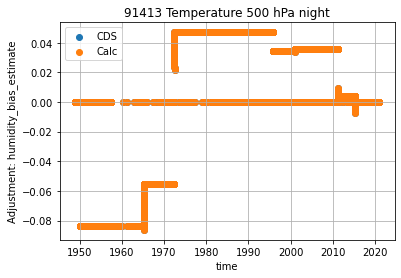

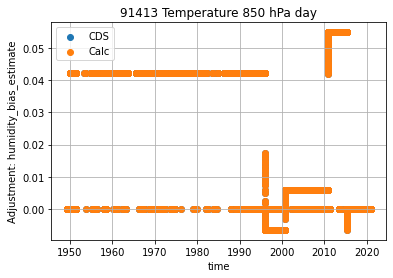

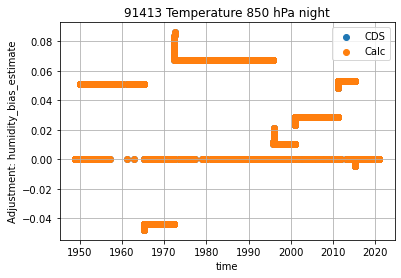

In [55]:
station = '91413'
dd, nd, dcd, ncd = get_adj(station)

plt_adj(dcd, dd, 100, station, 'day', 'humidity_bias_estimate', save=True)
plt_adj(ncd, nd, 100, station, 'night', 'humidity_bias_estimate', save=True)
plt_adj(dcd, dd, 500, station, 'day', 'humidity_bias_estimate', save=True)
plt_adj(ncd, nd, 500, station, 'night', 'humidity_bias_estimate', save=True)
plt_adj(dcd, dd, 850, station, 'day', 'humidity_bias_estimate', save=True)
plt_adj(ncd, nd, 850, station, 'night', 'humidity_bias_estimate', save=True)

2021-05-04 08:34:43,775 INFO Reading Profile on slice(None, None, None)
2021-05-04 08:34:46,772 INFO Welcome to the CDS
2021-05-04 08:34:46,773 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-05-04 08:34:46,866 INFO Request is completed
2021-05-04 08:34:46,867 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1620042926.6514504-17772-7-5da21943-5a67-49a2-98ed-875cb79a39f6.zip to download.zip (17.5M)
2021-05-04 08:34:47,412 INFO Download rate 32.1M/s  
2021-05-04 08:34:47,554 INFO Reading Profile on slice(None, None, None)


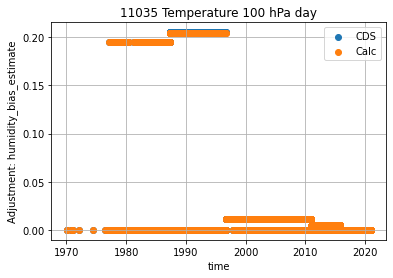

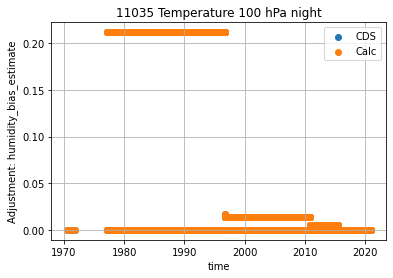

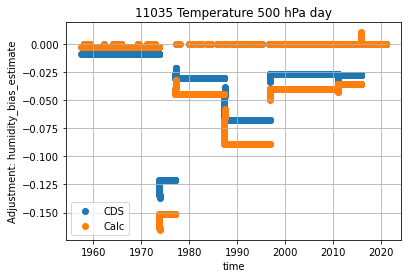

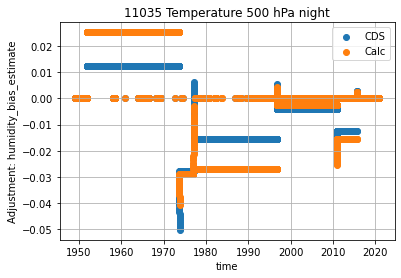

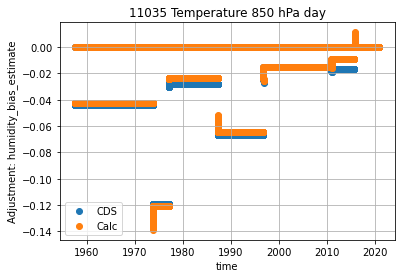

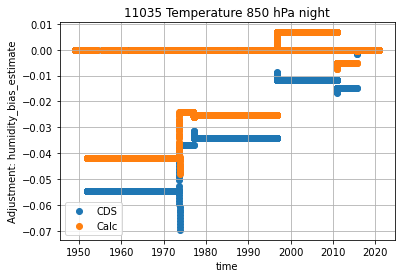

In [56]:
station = '11035'
dd, nd, dcd, ncd = get_adj(station)

plt_adj(dcd, dd, 100, station, 'day', 'humidity_bias_estimate', save=True)
plt_adj(ncd, nd, 100, station, 'night', 'humidity_bias_estimate', save=True)
plt_adj(dcd, dd, 500, station, 'day', 'humidity_bias_estimate', save=True)
plt_adj(ncd, nd, 500, station, 'night', 'humidity_bias_estimate', save=True)
plt_adj(dcd, dd, 850, station, 'day', 'humidity_bias_estimate', save=True)
plt_adj(ncd, nd, 850, station, 'night', 'humidity_bias_estimate', save=True)

2021-05-04 08:34:59,502 INFO Reading Profile on slice(None, None, None)
2021-05-04 08:35:05,524 INFO Welcome to the CDS
2021-05-04 08:35:05,525 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-05-04 08:35:05,604 INFO Request is completed
2021-05-04 08:35:05,605 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1620052654.9880269-28585-17-a1385f5e-e6de-4efa-bbcb-846034bcea85.zip to download.zip (31.6M)
2021-05-04 08:35:07,657 INFO Download rate 15.4M/s  
2021-05-04 08:35:07,823 INFO Reading Profile on slice(None, None, None)


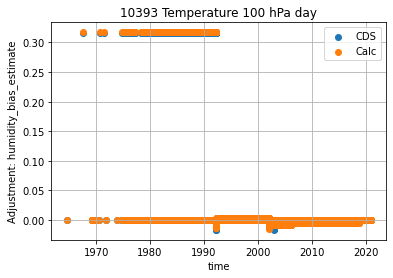

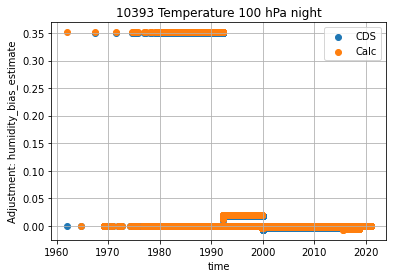

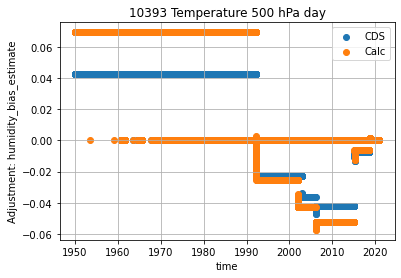

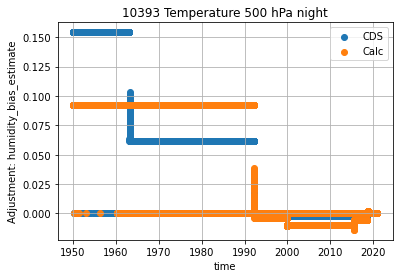

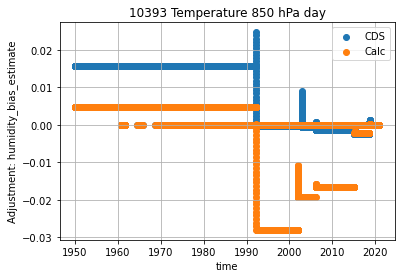

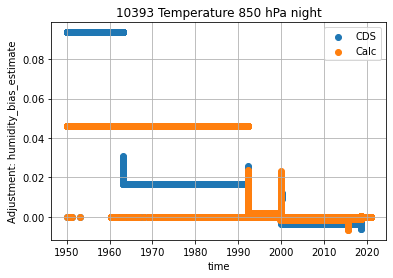

In [57]:
station = '10393'
dd, nd, dcd, ncd = get_adj(station)

plt_adj(dcd, dd, 100, station, 'day', 'humidity_bias_estimate', save=True)
plt_adj(ncd, nd, 100, station, 'night', 'humidity_bias_estimate', save=True)
plt_adj(dcd, dd, 500, station, 'day', 'humidity_bias_estimate', save=True)
plt_adj(ncd, nd, 500, station, 'night', 'humidity_bias_estimate', save=True)
plt_adj(dcd, dd, 850, station, 'day', 'humidity_bias_estimate', save=True)
plt_adj(ncd, nd, 850, station, 'night', 'humidity_bias_estimate', save=True)